In [ ]:
#Import libraries

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

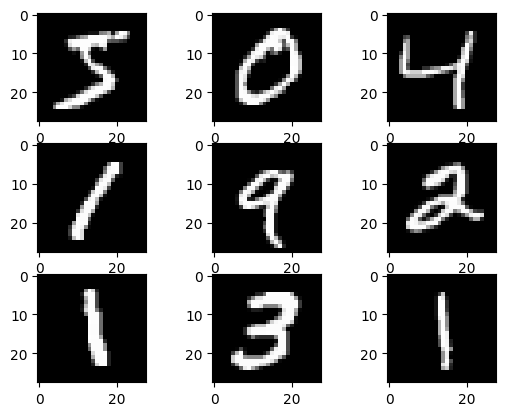

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test:  X=(10000, 28, 28), y=(10000,)


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test:  X=(10000, 28, 28, 1), y=(10000,)


In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test:  X=(10000, 28, 28, 1), y=(10000,)


In [ ]:
# These lines perform color channel conversion by taking a weighted sum of the RGB channels using the provided coefficients [0.299, 0.587, 0.114].
# This operation effectively converts the color images to grayscale, where each pixel now represents a single grayscale intensity value.
# x_train=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
# x_test=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])

In [ ]:
# add empty color dimension
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

In [ ]:
print("Loaded training images of shape:", x_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", x_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28, 1)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28, 1)
Loaded test labels of shape (10000,)


In [ ]:
#Split the dataset into train and valid
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(50000, 28, 28, 1) (10000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# cnn model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.legacy.Adam(learning_rate= 0.001),
  loss=tf.keras.losses.sparse_categorical_crossentropy,
  metrics=['sparse_categorical_accuracy']
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_16 (Ba  (None, 28, 28, 1)         4         
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_17 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
batch_size = 64
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs = 20,
  steps_per_epoch = int(np.ceil(x_train.shape[0] / batch_size)),
  validation_data = (x_valid, y_valid),
  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)] # helps to stop learning when overfitting occurs
)

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 0.2800 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.0622 - val_sparse_categorical_accuracy: 0.9848
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9769 - val_loss: 0.0337 - val_sparse_categorical_accuracy: 0.9905
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0517 - val_sparse_categorical_accuracy: 0.9878
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0533 - val_sparse_categorical_accuracy: 0.9881
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.0465 - val_sparse_categorical_accuracy: 0.9886
Epoch 6/20
782/782 [==============================] - 10s 12ms/step - loss: 0.0429 - sparse_ca

In [ ]:
# Print validation accuracy
score = model.evaluate(x_valid, y_valid, verbose=0)
print('\n', 'Valid accuracy:', score[1])

# Print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Valid accuracy: 0.9911999702453613

 Test accuracy: 0.9930999875068665


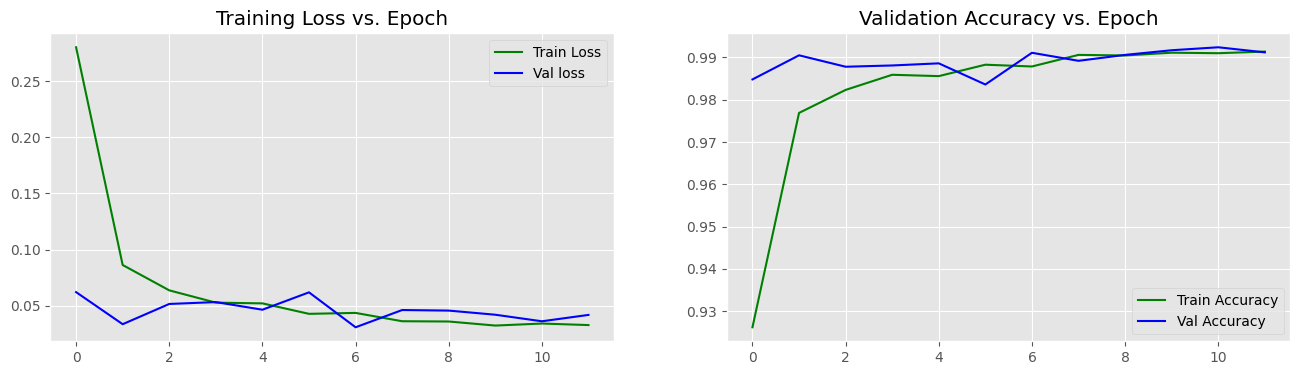

In [ ]:
# Changing default figure size for properly accomodating images
from pylab import rcParams
rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Training Loss vs. Epoch')
ax2.set_title('Validation Accuracy vs. Epoch')

ax1.plot(history.history['loss'], color='green', label='Train Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Val loss')

ax2.plot(history.history['sparse_categorical_accuracy'], color='green', label='Train Accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], color='blue', label='Val Accuracy')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 103ms/step


<Figure size 400x300 with 0 Axes>

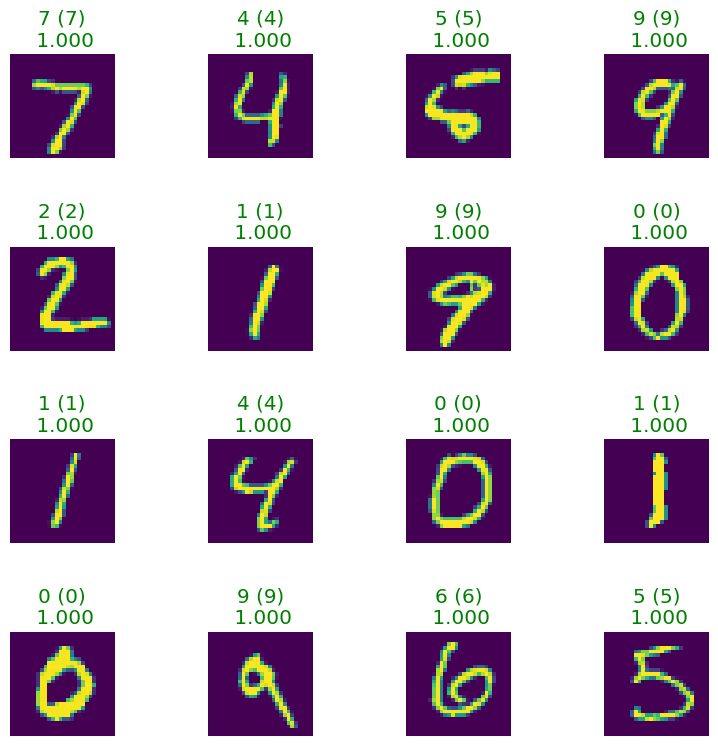

In [ ]:
LABEL_NAMES=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

from matplotlib import pyplot
def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  # axes = fig.add_subplot(nc, 4)
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      LABEL_NAMES[pred_label],
      LABEL_NAMES[true_labels[i]],
      confidence
    ), color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)

plot_predictions(
  np.squeeze(x_test[:16]),
  model.predict(x_test[:16]),
  y_test[:16]
)

# # plot first few images
# for i in range(9):
#  # define subplot
#  pyplot.subplot(330 + 1 + i)
#  # plot raw pixel data
#  pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))

# # show the figure
# pyplot.show()

# predictions = model.predict(x_test[:9]);

# # Get the predicted class labels and confidence scores
# predicted_labels = np.argmax(predictions, axis=1)   # axis = 1 (column); axis = 0 (row)
# confidence_scores = np.max(predictions, axis=1)     # axis = 1 (column); axis = 0 (row)

# print(predicted_labels)
# print(confidence_scores)

# # Print predicted labels and confidence scores
# for i, (predicted, confidence) in enumerate(zip(predicted_labels, confidence_scores)):
#   print(f"image: {LABEL_NAMES[predicted]}: Predicted Label: {predicted}, Confidence: {confidence:.2f}")